In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)
    plt.title('%i circles' % len(cx))
    plt.show()

In [2]:
import numpy as np
import scipy.ndimage
import os
import glob
import cv2
from PIL import Image
import time

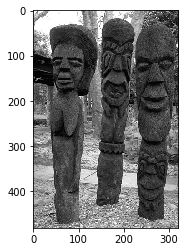

In [31]:
path = r"C:\Users\kathe\Desktop\ECE549\mp2-release\blobs-data"
data_path = os.path.join(path,'*g')
files = glob.glob(data_path)
images = []
for f1 in files:
    images.append(f1)
img = cv2.imread(images[0], 0)/255.0
plt.imshow(img, cmap = 'gray')

--- 4.429156064987183 time elapsed ---


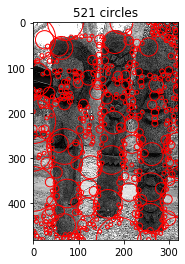

In [32]:
###basic implementation
init, scale, levels, thres = 3, 1.25, 12, 0.004
h, w = np.shape(img)
space = np.zeros((levels,h,w))
rank= np.zeros((levels,h,w))
compare = np.zeros((levels,h, w))
start_time = time.time()
for i in range(levels):
    sigma = init*scale**i
    gauss = sigma*sigma*scipy.ndimage.filters.gaussian_laplace(img, sigma = sigma)
    space[i,:, :] = gauss*gauss
    rank[i,:, :] = scipy.ndimage.filters.rank_filter(space[i,:, :], rank = -1, size = (5, 5))

for i in range(h):
    for j in range(w):
        maxx = max(rank[:,i, j])
        idx = np.argmax(rank[:,i, j])
        if maxx == space[ idx,i, j] and maxx >= thres:
            compare[idx,i, j] = maxx;

cx = []
cy = []
rad = []
for n in range(levels):
    for i in range(h):
        for j in range(w):
            if compare[n,i, j ] != 0:
                cx.append(j)
                cy.append(i)
                rad1 = np.sqrt(2) * init * pow(scale,n)
                rad.append(rad1)

print("--- %s time elapsed ---" % (time.time() - start_time))
show_all_circles(img, cx, cy, rad)

--- 5.354279041290283 time elapsed ---


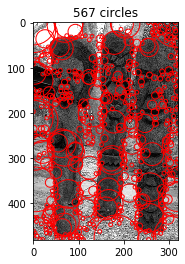

In [33]:
 ###efficient implementation  
import skimage
import math
init, scale, levels, thres = 3, 1.25, 12, 0.004
h, w = np.shape(img)
space = np.zeros((levels,h,w))
rank= np.zeros((levels,h,w))
compare = np.zeros((levels,h, w))

cx = []
cy = []
rad = []

start_time = time.time()
for i in range(levels):
    img1 = skimage.transform.resize(img, (int(h/pow(scale,i)), int(w/pow(scale,i))), anti_aliasing=True)
    gauss = init*init*scipy.ndimage.filters.gaussian_laplace(img1, sigma = init)
    space[i,:, :] = skimage.transform.resize(gauss*gauss, (h, w),  anti_aliasing=True)
    rank[i,:, :] = scipy.ndimage.filters.rank_filter(space[i,:, :], rank = -1, size = (5, 5))
    
for i in range(h):
    for j in range(w):
        maxx = max(rank[:,i, j])
        idx = np.argmax(rank[:,i, j])
        if maxx == space[ idx,i, j] and maxx >= thres:
           ， compare[idx,i, j] = maxx

for n in range(levels):
    for i in range(h):
        for j in range(w):
            if compare[n,i, j ] != 0:
                cx.append(j)
                cy.append(i)
                rad2 = np.sqrt(2)*init*pow(scale, n)
                rad.append(rad2)

print("--- %s time elapsed ---" % (time.time() - start_time))
show_all_circles(img, cx, cy, rad)